# Scraping data

In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
url = "https://www.worldometers.info/coronavirus/"
html_page = requests.get(url).text

In [3]:
soup = bs(html_page, 'html.parser')
table_rows = soup.find('tbody').find_all('tr')
table_rows = table_rows[8:8+215]

In [4]:
countries = []
tot_cases = []
new_cases = []
tot_deaths = []
new_deaths = []
tot_recov = []
new_recov = []
act_cases = []
ser_cases = []
cases_per_1m = []
deaths_per_1m = []
tot_tests = []
tests_per_1m = []
population = []
one_case_xpll = []
one_death_xpll = []
one_test_xpll = []

In [5]:
def text_to_int(text):
    try:
        text = text.replace(',', '')
        text = text.replace('+', '')
        text = pd.to_numeric(text, downcast='float')
    except:
        text = 0.0
    if text != text:
        return 0
    a = int(text)
    return a

In [6]:
for tr in table_rows:
    td = tr.find_all('td')
    countries.append(td[1].text.strip())
    tot_cases.append(text_to_int(td[2].text.strip()))
    new_cases.append(text_to_int(td[3].text.strip()))
    tot_deaths.append(text_to_int(td[4].text.strip()))
    new_deaths.append(text_to_int(td[5].text.strip()))
    new_recov.append(text_to_int(td[7].text.strip()))
    tot_recov.append(text_to_int(td[6].text.strip()))
    act_cases.append(text_to_int(td[8].text.strip()))
    ser_cases.append(text_to_int(td[9].text.strip()))
    cases_per_1m.append(text_to_int(td[10].text.strip()))
    deaths_per_1m.append(text_to_int(td[11].text.strip()))
    tot_tests.append(text_to_int(td[12].text.strip()))
    tests_per_1m.append(text_to_int(td[13].text.strip()))
    population.append(text_to_int(td[14].text.strip()))
    one_case_xpll.append(text_to_int(td[16].text.strip()))
    one_death_xpll.append(text_to_int(td[17].text.strip()))
    one_test_xpll.append(text_to_int(td[18].text.strip()))

In [7]:
indices = [i for i in range(1,len(countries)+1)]
headers = ["Country", "Total Cases", "New Cases", "Total Deaths", "New Deaths", "Total Recovered", "New Recovered", "Active Cases", "Serious Cases", "Tot Cases/1M pop", "Death/1M pop", "Total Tests", "Tests/1M pop", "Population", "1 Case every X ppl", "1 Death every X ppl", "1 Test every X ppl"]

In [172]:
df = pd.DataFrame(list(zip(countries, tot_cases, new_cases, tot_deaths, new_deaths, tot_recov, new_recov, act_cases, ser_cases, cases_per_1m, deaths_per_1m, tot_tests, tests_per_1m, population, one_case_xpll, one_death_xpll, one_test_xpll)),index=indices,columns=headers)
df = df.sort_values(by='Total Cases', ascending=False)
df.index = range(1,len(df)+1)
df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious Cases,Tot Cases/1M pop,Death/1M pop,Total Tests,Tests/1M pop,Population,1 Case every X ppl,1 Death every X ppl,1 Test every X ppl
1,USA,5035835,3656,162854,50,2577914,1246,2295067,18296,15205,492,63158904,190698,331198144,66,2034,5
2,Brazil,2917562,0,98644,0,2047660,0,771258,8318,13716,464,13206188,62085,212710688,73,2156,16
3,India,2040261,14852,41792,154,1386452,9068,612017,8944,1477,30,22788392,16497,1381345024,677,33053,61
4,Russia,877135,5241,14725,119,683592,7235,178818,2300,6010,101,30038124,205824,145940928,166,9911,5
5,South Africa,538184,0,9604,0,387316,0,141264,539,9063,162,3149807,53044,59381568,110,6183,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,MS Zaandam,9,0,2,0,0,0,7,0,0,0,0,0,0,0,0,0
212,British Virgin Islands,9,0,1,0,7,0,1,0,298,33,1522,50312,30251,3361,30251,20
213,St. Barth,9,0,0,0,6,0,3,0,911,0,1246,126113,9880,1098,0,8
214,Saint Pierre Miquelon,4,0,0,0,1,0,3,0,691,0,0,0,5791,1448,0,0


# Visualization

* Heatmap

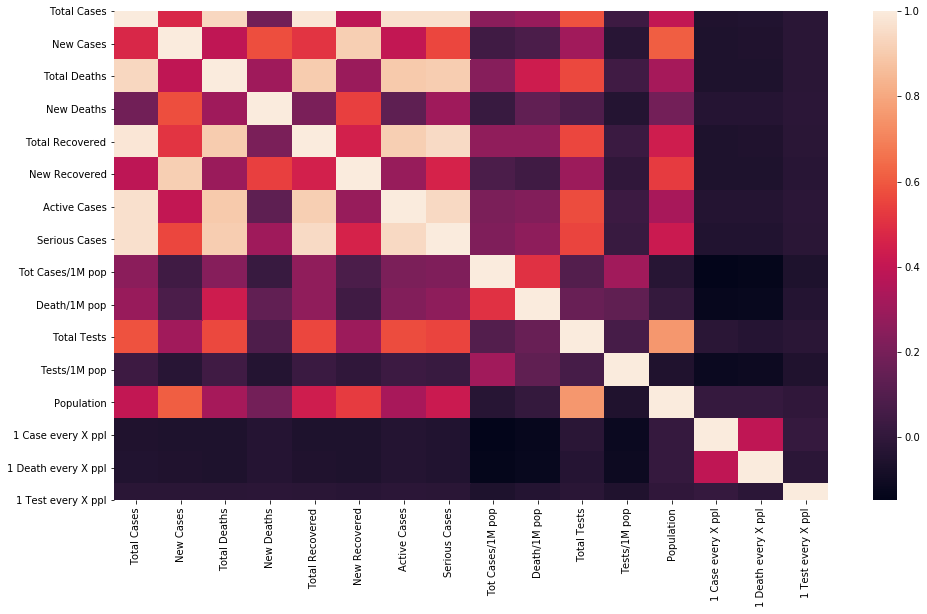

In [173]:
corr = df.corr()
plt.figure(figsize = (16,9))
sns.heatmap(corr)
plt.show()

* Top 20 Deaths per 1M population

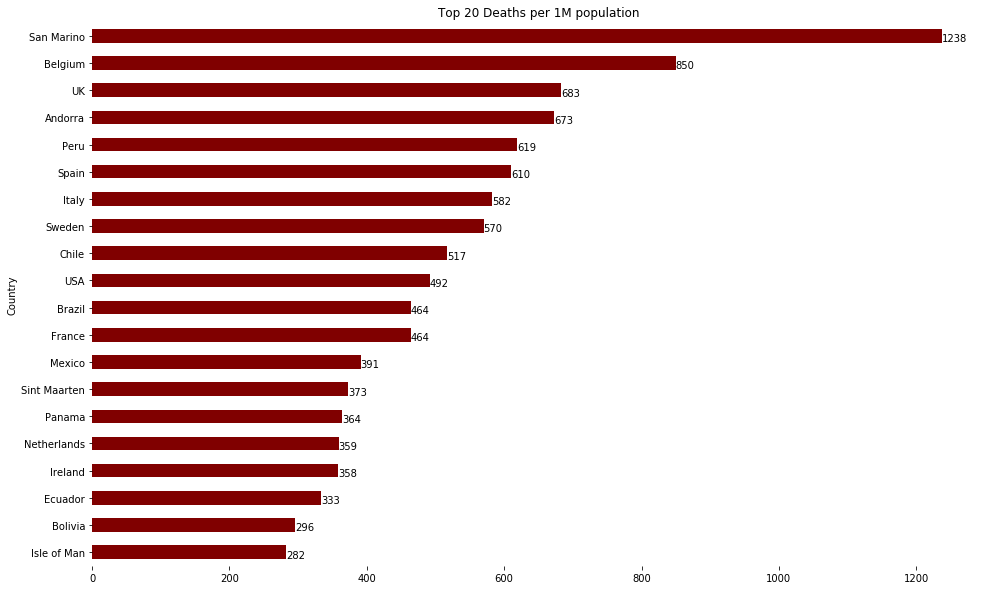

In [177]:
dp1m = df.nlargest(20,'Death/1M pop')[['Country', 'Death/1M pop']]
dp1m.index = range(1,len(dp1m)+1)
ax = dp1m[::-1].plot.barh(x='Country', y='Death/1M pop', figsize=(16, 10), colors = "maroon", legend=False, title = 'Top 20 Deaths per 1M population')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
for i, v in enumerate(dp1m[::-1]['Death/1M pop']):
    ax.text(v, i-.2, str(v))

* Top 20 Cases per 1M population

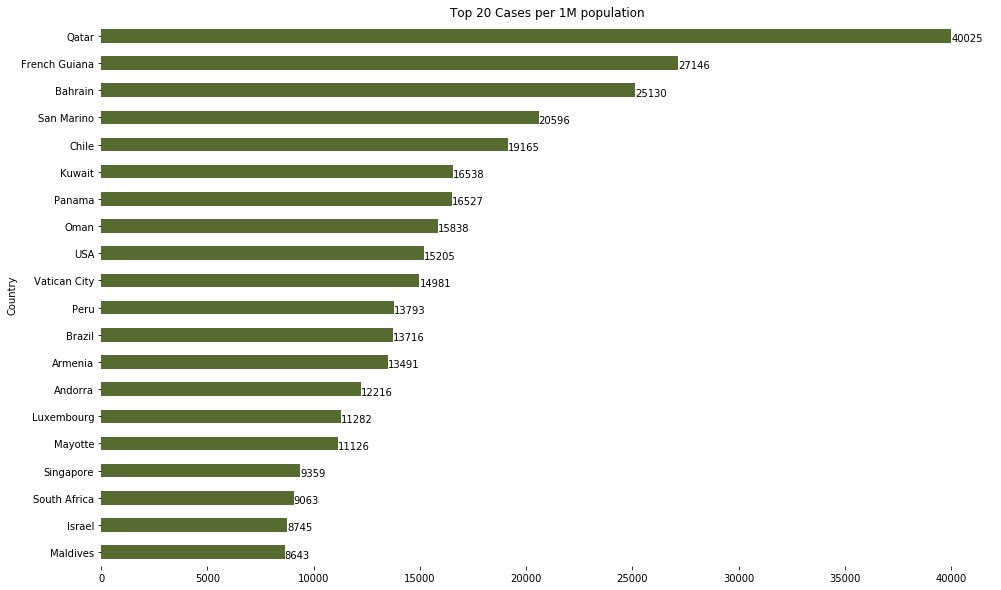

In [175]:
cp1m = df.nlargest(20,'Tot Cases/1M pop')[['Country', 'Tot Cases/1M pop']]
cp1m.index = range(1,len(cp1m)+1)
ax = cp1m[::-1].plot.barh(x='Country', y='Tot Cases/1M pop', figsize=(16, 10), colors = "darkolivegreen", legend=False, title = 'Top 20 Cases per 1M population')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
for i, v in enumerate(cp1m[::-1]['Tot Cases/1M pop']):
    ax.text(v, i-.2, str(v))

* The relionship between Serious Cases and Total Deaths

C:\Users\phamh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


0.5016766843794453


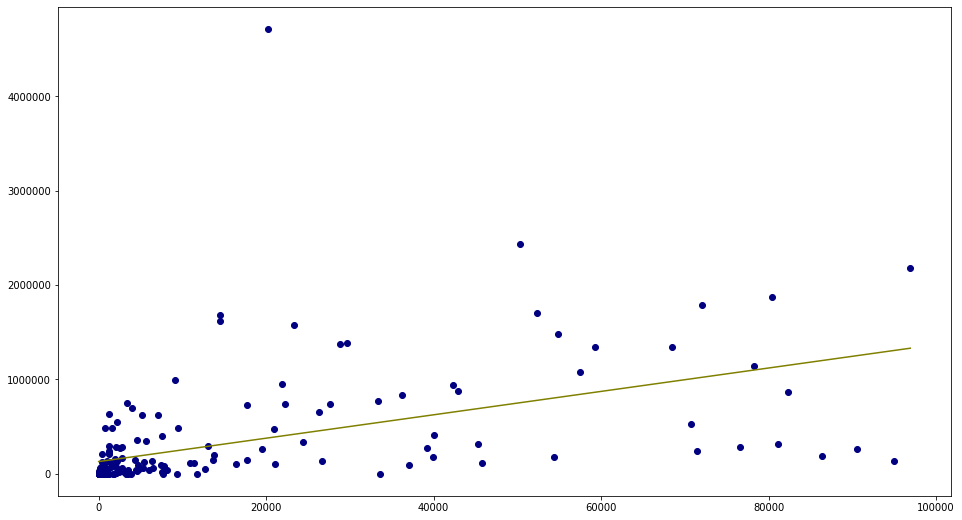

In [226]:
xname = 'Total Cases'
yname = 'Total Tests'
ndf = df[['Country', yname, xname]]
ndf = ndf[ndf[xname] <= 100000][ndf[yname] <= 5000000]
ndf.index = range(1,len(ndf)+1)
print(ndf[yname].corr(ndf[xname]))
from sklearn.linear_model import LinearRegression
X = ndf[xname].values.reshape(-1, 1)
Y = ndf[yname].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)
plt.figure(figsize=(16, 9))
plt.scatter(X, Y, color='navy')
plt.plot(X, Y_pred, color='olive')
plt.show()